<a href="https://colab.research.google.com/github/amanS2206/Stock-price-predition-of-Apple-Inc./blob/main/Stock_Price_Prediction_of_Microsoft_Corp_By_Using_LSTM_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# get the data
df = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455
...,...,...,...,...,...,...
2019-12-11,151.869995,150.330002,151.539993,151.699997,18856600.0,150.502777
2019-12-12,153.440002,151.020004,151.649994,153.240005,24612100.0,152.030640
2019-12-13,154.889999,152.830002,153.000000,154.529999,23845400.0,153.310455


In [5]:
# get the number of columns and rows
df.shape

(2003, 6)

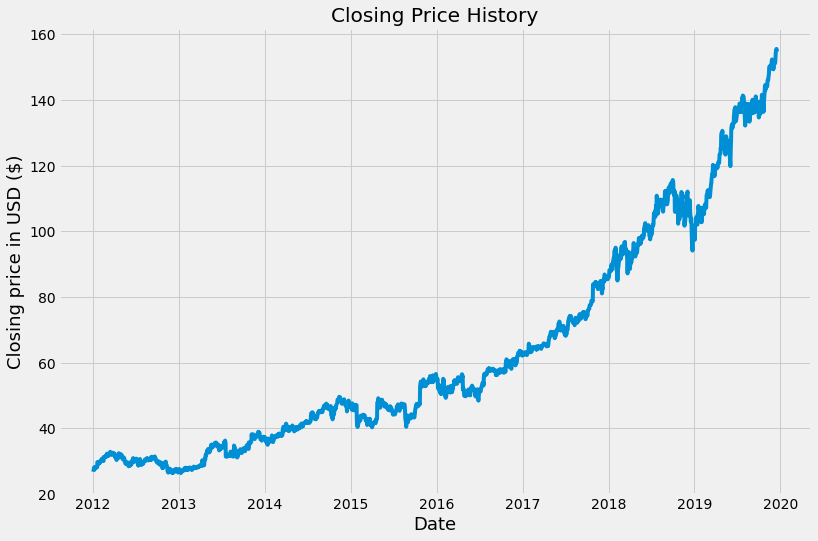

In [6]:
# visualize the  closing data
plt.figure(figsize=(12,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date' ,fontsize=18)
plt.ylabel('Closing price in USD ($)', fontsize = 18)
plt.show()

In [7]:
# create the data with only close price column
data = df.filter(['Close'])
# convert the dataframe in to numpy array
dataset = data.values

# get the number of rows to train the model
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1603

In [8]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00309693],
       [0.0079746 ],
       [0.01014245],
       ...,
       [0.99225766],
       [1.        ],
       [0.99349647]])

In [9]:
# create the scaled training dataset 
train_data = scaled_data[0 : training_data_len, :]
# split the data into x_train and y_train subset
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])


In [10]:
# convert the x_train and y_train in to numpy array
x_train , y_train = np.array(x_train) , np.array(y_train)

In [11]:
# reshape the array
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(1543, 60, 1)

In [12]:
# build the LSTM Model 

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
# compile the model
model.compile(optimizer='adam' , loss='mean_squared_error')

In [14]:
# train the data

model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 33s 22ms/step - loss: 4.6134e-04


In [15]:
# create the testing data
# create the new array containing scaled values from  1543 to 2003
test_data = scaled_data[training_data_len-60 : , :]
# create the dataset x_train and y_train
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [16]:
# convert the data into numpy array
x_test = np.array(x_test)

In [17]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1], 1))
x_test.shape

(400, 60, 1)

In [18]:
# get the models predicted price and values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [20]:
rmse

2.5263278388977053

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


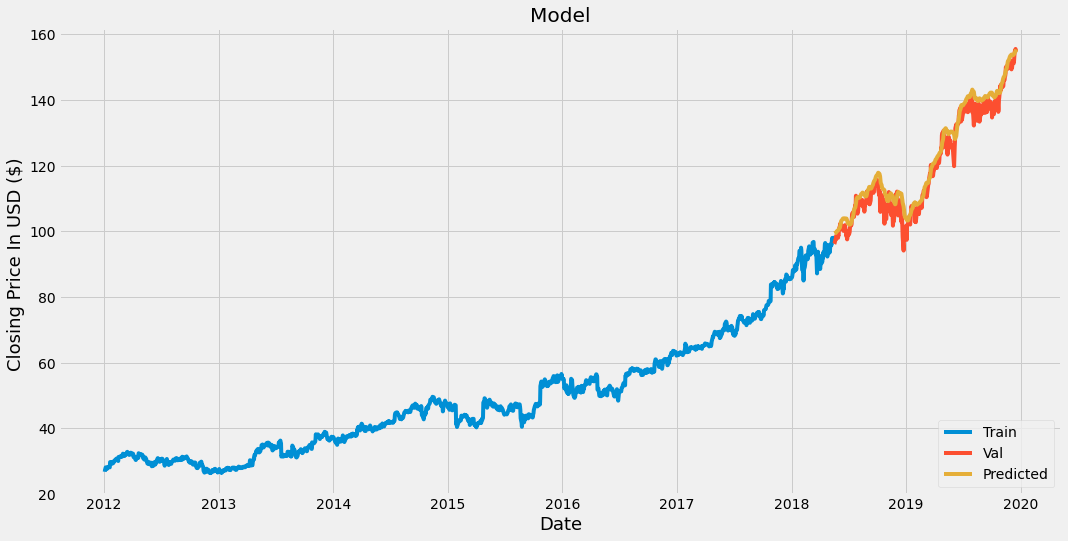

In [22]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Closing Price In USD ($) ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
plt.show()

In [23]:
valid

,Close,Predictions
Date,,
2018-05-17,96.180000,99.441406
2018-05-18,96.360001,99.488258
2018-05-21,97.599998,99.466049
2018-05-22,97.500000,99.531036
2018-05-23,98.660004,99.620941
...,...,...
2019-12-11,151.699997,153.911072
2019-12-12,153.240005,154.064133
2019-12-13,154.529999,154.363525


In [25]:
# get the quote 
microsoft_quote = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01' ,end='2012-12-17')
# create the dataframe
new_df = microsoft_quote.filter(['Close'])
# get the last 60 days price and convert in to the array
last_60_days = new_df[-60:].values
# scale the data
last_60_days_scaled = scaler.transform(last_60_days)
# create the empy list
x_test = []
# get the last 60 days data
x_test.append(last_60_days_scaled)
# convert the scaled data into the numpy array
x_test = np.array(x_test)
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1], 1))
# get the predicted price
pred_price = model.predict(x_test)
# undo the scalling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[25.379917]]


In [26]:
microsoft_quote2 = web.DataReader('MSFT', data_source='yahoo', start='2012-12-18', end='2012-12-18')
print(microsoft_quote2['Close'])

Date
2012-12-18    27.559999
Name: Close, dtype: float64
